In [33]:
# Import dependencies
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
import pandas as pd
import pyspark
import pyspark.pandas as ps
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from pyspark.shell import spark

In [34]:
#Assign path to variable
alzheimer_data_path = "../data/alzheimers_disease_data.csv"

In [35]:
#Create temp view to be able to easily query from DataFrame
spark_test_df = spark.read.csv(alzheimer_data_path, header = 'True')

In [36]:
#Get the BMI for alzheimer POSITIVE patients into a dataframe
spark_test_df.createOrReplaceTempView('view')
alzheimer_positive_data = spark.sql("""SELECT BMI FROM view WHERE Diagnosis=1""")
alzheimer_positive_data.createOrReplaceTempView("alzheimer_positive")
spark.sql("SELECT * FROM alzheimer_positive").show()
plot_positive_df = alzheimer_positive_data.toPandas()

+------------------+
|               BMI|
+------------------+
|18.776009409162835|
|28.870652386039602|
| 18.04591747393549|
|22.822896244065568|
| 16.33328275322603|
|20.041400357053135|
| 36.22309879636211|
| 21.96939009200723|
|15.457688068877605|
|17.572895650191803|
|36.221033471912186|
| 33.78068523580437|
|24.852705199101358|
| 37.56853045247124|
|26.804163783794337|
|15.648055357542315|
|33.476970506688936|
| 32.03489967050928|
|15.639676831549425|
| 38.07613526117206|
+------------------+
only showing top 20 rows



In [37]:
#Get the BMI for alzheimer NEGATIVE patients into a dataframe
spark_test_df.createOrReplaceTempView('view')
alzheimer_negative_data = spark.sql("""SELECT BMI FROM view WHERE Diagnosis=0""")
alzheimer_negative_data.createOrReplaceTempView("alzheimer_negative")
spark.sql("SELECT * FROM alzheimer_negative").show()
plot_negative_df = alzheimer_negative_data.toPandas()

+------------------+
|               BMI|
+------------------+
|22.927749230993864|
| 26.82768119159602|
|17.795882442817113|
| 33.80081704413547|
|20.716973826446807|
|30.626885546270938|
|38.387621858169126|
|27.833188380332352|
| 35.45630172642629|
| 39.46303422106146|
|22.463382649410605|
|26.770945999107713|
|27.942862734988346|
| 37.93246902566973|
|37.543943165696646|
|37.583877059139006|
| 39.12367687367173|
| 34.91818382670918|
|  18.4347889493694|
| 30.95364704240386|
+------------------+
only showing top 20 rows



(array([34., 24., 29., 30., 20., 32., 31., 31., 36., 30., 21., 32., 30.,
        31., 27., 31., 18., 33., 36., 38., 25., 35., 48., 25., 33.]),
 array([15.01823993, 16.01722103, 17.01620213, 18.01518323, 19.01416434,
        20.01314544, 21.01212654, 22.01110764, 23.01008874, 24.00906984,
        25.00805094, 26.00703204, 27.00601315, 28.00499425, 29.00397535,
        30.00295645, 31.00193755, 32.00091865, 32.99989975, 33.99888086,
        34.99786196, 35.99684306, 36.99582416, 37.99480526, 38.99378636,
        39.99276746]),
 <BarContainer object of 25 artists>)

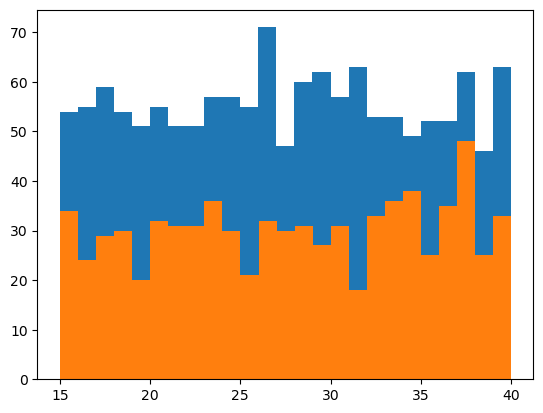

In [38]:
plot_positive_df['BMI']= plot_positive_df['BMI'].astype(float)
plot_negative_df['BMI']= plot_negative_df['BMI'].astype(float)
plt.hist(plot_negative_df, bins = 25)
plt.hist(plot_positive_df, bins = 25)
#hist = plot_positive_df.hist(bins=25) 
#hist = plot_negative_df.hist(bins =25)

In [39]:
#Get the DietQuality for alzheimer POSITIVE patients into a dataframe
spark_test_df.createOrReplaceTempView('view')
alzheimer_positive_data = spark.sql("""SELECT DietQuality FROM view WHERE Diagnosis=1""")
alzheimer_positive_data.createOrReplaceTempView("alzheimer_positive")
spark.sql("SELECT * FROM alzheimer_positive").show()
plot_positive_df = alzheimer_positive_data.toPandas()

+-------------------+
|        DietQuality|
+-------------------+
|  8.341903191502704|
|  1.653281416913489|
|  7.570632793725998|
|  7.929485772084872|
| 2.8889355278712294|
|  3.361536132824541|
|  7.971127068871205|
| 3.2423431324092586|
|  6.217547835258514|
|  3.192164279390383|
|   2.40458512208533|
|  4.269645241994068|
|  4.553545357453736|
|  9.750510860070055|
|   7.69909381443262|
|  4.944311503010534|
|  9.648614359042611|
|  3.003473371070846|
|0.16140287245550278|
|  1.915171496332837|
+-------------------+
only showing top 20 rows



In [40]:
#Get the DietQuality for alzheimer NEGATIVE patients into a dataframe
spark_test_df.createOrReplaceTempView('view')
alzheimer_negative_data = spark.sql("""SELECT DietQuality FROM view WHERE Diagnosis=0""")
alzheimer_negative_data.createOrReplaceTempView("alzheimer_negative")
spark.sql("SELECT * FROM alzheimer_negative").show()
plot_negative_df = alzheimer_negative_data.toPandas()

+-------------------+
|        DietQuality|
+-------------------+
| 1.3472143059081076|
| 0.5187671386507053|
|  1.826334664579784|
|   7.43560414000302|
| 0.7954975089177474|
|  1.584922010674088|
|  5.897387927490878|
|  6.736882043694737|
|  8.086019121177605|
|0.43402027782902697|
|  8.279189503998566|
|    7.0244173809347|
|  5.317231743513623|
| 3.3149826638192073|
| 3.5312068468822524|
|   9.76757902526422|
|0.04314651892614707|
|0.40634805209964764|
| 2.0325055299205284|
| 1.2892518488393956|
+-------------------+
only showing top 20 rows



(array([81., 71., 75., 74., 73., 80., 70., 77., 83., 76.]),
 array([0.01993976, 1.0150662 , 2.01019264, 3.00531908, 4.00044551,
        4.99557195, 5.99069839, 6.98582482, 7.98095126, 8.9760777 ,
        9.97120414]),
 <BarContainer object of 10 artists>)

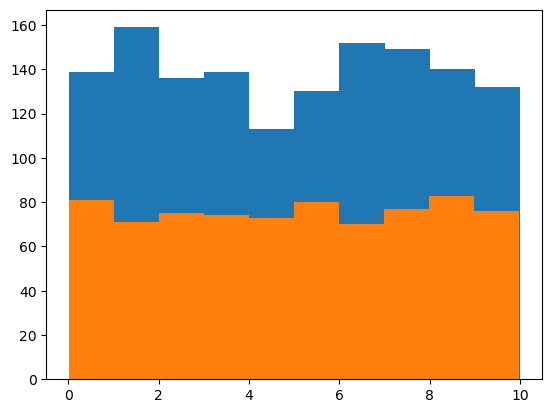

In [43]:
plot_positive_df['DietQuality']= plot_positive_df['DietQuality'].astype(float)
plot_negative_df['DietQuality']= plot_negative_df['DietQuality'].astype(float)
plt.hist(plot_negative_df, bins = 10)
plt.hist(plot_positive_df, bins = 10)


In [44]:
#Get the AlcoholConsumption for alzheimer POSITIVE patients into a dataframe
spark_test_df.createOrReplaceTempView('view')
alzheimer_positive_data = spark.sql("""SELECT AlcoholConsumption FROM view WHERE Diagnosis=1""")
alzheimer_positive_data.createOrReplaceTempView("alzheimer_positive")
spark.sql("SELECT * FROM alzheimer_positive").show()
plot_positive_df = alzheimer_positive_data.toPandas()

+------------------+
|AlcoholConsumption|
+------------------+
|13.723825705512622|
|10.194706301683002|
| 8.116831615915244|
| 4.433961006314455|
| 4.161794911046941|
|18.426364465753824|
|  4.19289550965694|
|3.2896501984691406|
| 9.775941142399535|
|19.966670359022707|
|2.6536664118255193|
| 13.44208168540459|
|12.644183618611036|
| 2.218579778507974|
|19.688744302145626|
| 17.88591914169506|
|15.809404159618325|
|3.0600960202439786|
|15.649190272628825|
|19.984018416523096|
+------------------+
only showing top 20 rows



In [45]:
#Get the AlcoholConsumption for alzheimer NEGATIVE patients into a dataframe
spark_test_df.createOrReplaceTempView('view')
alzheimer_negative_data = spark.sql("""SELECT AlcoholConsumption FROM view WHERE Diagnosis=0""")
alzheimer_negative_data.createOrReplaceTempView("alzheimer_negative")
spark.sql("SELECT * FROM alzheimer_negative").show()
plot_negative_df = alzheimer_negative_data.toPandas()

+------------------+
|AlcoholConsumption|
+------------------+
| 13.29721772827684|
|4.5425238177221905|
| 19.55508452555359|
|12.209265546203783|
|18.454356090619612|
| 4.140143784276235|
|0.6460472705489217|
|12.167847629604712|
| 16.02868823659191|
| 9.811292128906842|
|19.300182977973385|
|10.978021644757177|
|2.1757796502821014|
| 9.385602765284368|
|12.063959313182217|
| 5.836420770415041|
| 0.953868876213162|
|10.428664097862917|
|15.919274092857767|
| 4.692218861789743|
+------------------+
only showing top 20 rows



(array([80., 71., 89., 66., 78., 64., 79., 88., 69., 76.]),
 array([ 0.065286  ,  2.05758653,  4.04988706,  6.04218759,  8.03448813,
        10.02678866, 12.01908919, 14.01138972, 16.00369026, 17.99599079,
        19.98829132]),
 <BarContainer object of 10 artists>)

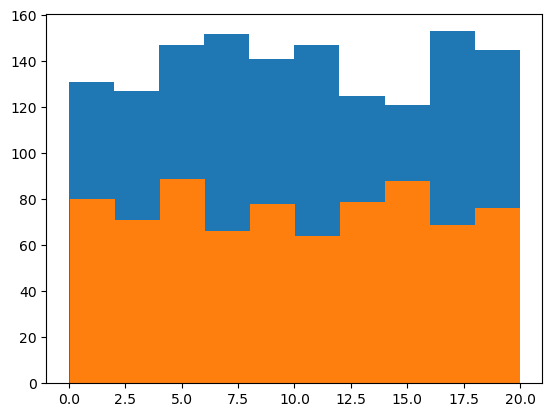

In [47]:
plot_positive_df['AlcoholConsumption']= plot_positive_df['AlcoholConsumption'].astype(float)
plot_negative_df['AlcoholConsumption']= plot_negative_df['AlcoholConsumption'].astype(float)
plt.hist(plot_negative_df, bins = 10)
plt.hist(plot_positive_df, bins = 10)


In [48]:
#Get the SleepQuality for alzheimer POSITIVE patients into a dataframe
spark_test_df.createOrReplaceTempView('view')
alzheimer_positive_data = spark.sql("""SELECT SleepQuality FROM view WHERE Diagnosis=1""")
alzheimer_positive_data.createOrReplaceTempView("alzheimer_positive")
spark.sql("SELECT * FROM alzheimer_positive").show()
plot_positive_df = alzheimer_positive_data.toPandas()

+------------------+
|      SleepQuality|
+------------------+
| 4.213209925103094|
| 7.333235622932847|
| 6.736796641729542|
| 4.654828040280001|
| 5.436422671151927|
| 7.393126210784456|
| 9.521026998926784|
|4.4125955011923566|
|6.7325950076725825|
|  6.16464623042618|
| 8.810729380102739|
| 6.046635135585661|
| 8.833340547414064|
| 9.741159407092935|
| 6.715982191312737|
| 8.473919092103424|
| 8.204619338232337|
|5.1230093568427595|
|  8.35376119760604|
| 9.710274145896904|
+------------------+
only showing top 20 rows



In [49]:
#Get the SleepQuality for alzheimer NEGATIVE patients into a dataframe
spark_test_df.createOrReplaceTempView('view')
alzheimer_negative_data = spark.sql("""SELECT SleepQuality FROM view WHERE Diagnosis=0""")
alzheimer_negative_data.createOrReplaceTempView("alzheimer_negative")
spark.sql("SELECT * FROM alzheimer_negative").show()
plot_negative_df = alzheimer_negative_data.toPandas()

+-----------------+
|     SleepQuality|
+-----------------+
|9.025678665766115|
|7.151292743051223|
|9.673574157961111|
|8.392553685350862|
|5.597237677578526|
|7.261952504681128|
|5.477685593697583|
|5.748223868874191|
| 7.55177344379122|
|7.644097300051016|
|8.312325536865838|
|8.253004551076643|
|9.087141194537402|
|6.790196088361632|
|9.574004794993964|
|9.250389464823087|
|9.582176669777855|
|5.797063982273073|
|6.090393671344253|
|7.869067535006348|
+-----------------+
only showing top 20 rows



(array([96., 76., 73., 66., 80., 74., 76., 73., 74., 72.]),
 array([4.00617092, 4.60531655, 5.20446219, 5.80360782, 6.40275346,
        7.00189909, 7.60104473, 8.20019036, 8.799336  , 9.39848163,
        9.99762727]),
 <BarContainer object of 10 artists>)

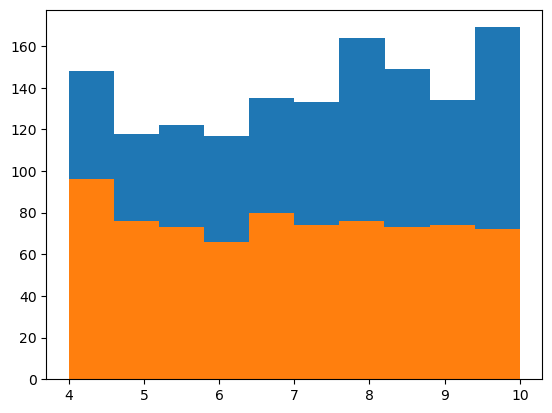

In [54]:
plot_positive_df['SleepQuality']= plot_positive_df['SleepQuality'].astype(float)
plot_negative_df['SleepQuality']= plot_negative_df['SleepQuality'].astype(float)
plt.hist(plot_negative_df, bins = 10)
plt.hist(plot_positive_df, bins = 10)


In [55]:
#Get the Ethnicity for alzheimer POSITIVE patients into a dataframe
spark_test_df.createOrReplaceTempView('view')
alzheimer_positive_data = spark.sql("""SELECT Ethnicity FROM view WHERE Diagnosis=1""")
alzheimer_positive_data.createOrReplaceTempView("alzheimer_positive")
spark.sql("SELECT * FROM alzheimer_positive").show()
plot_positive_df = alzheimer_positive_data.toPandas()

+---------+
|Ethnicity|
+---------+
|        0|
|        0|
|        0|
|        1|
|        0|
|        0|
|        0|
|        2|
|        0|
|        1|
|        0|
|        0|
|        1|
|        0|
|        0|
|        1|
|        1|
|        0|
|        2|
|        2|
+---------+
only showing top 20 rows



In [56]:
#Get the Ethnicity for alzheimer NEGATIVE patients into a dataframe
spark_test_df.createOrReplaceTempView('view')
alzheimer_negative_data = spark.sql("""SELECT Ethnicity FROM view WHERE Diagnosis=0""")
alzheimer_negative_data.createOrReplaceTempView("alzheimer_negative")
spark.sql("SELECT * FROM alzheimer_negative").show()
plot_negative_df = alzheimer_negative_data.toPandas()

+---------+
|Ethnicity|
+---------+
|        0|
|        0|
|        3|
|        0|
|        0|
|        1|
|        3|
|        1|
|        0|
|        3|
|        0|
|        0|
|        0|
|        0|
|        1|
|        0|
|        1|
|        0|
|        0|
|        0|
+---------+
only showing top 20 rows



(array([463., 146., 151.]),
 array([0., 1., 2., 3.]),
 <BarContainer object of 3 artists>)

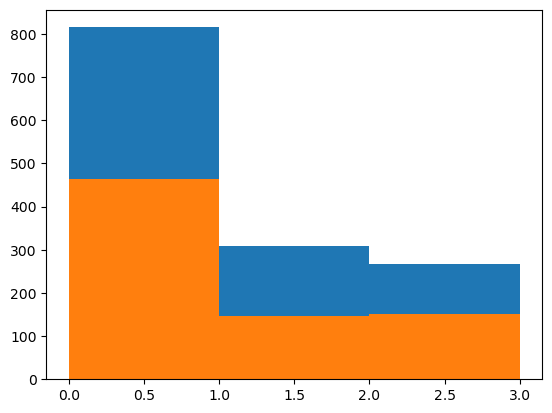

In [59]:
plot_positive_df['Ethnicity']= plot_positive_df['Ethnicity'].astype(float)
plot_negative_df['Ethnicity']= plot_negative_df['Ethnicity'].astype(float)
plt.hist(plot_negative_df, bins = 3)
plt.hist(plot_positive_df, bins = 3)